In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

In [2]:
!pip install LightGBM

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 789.7 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [21]:
train = pd.read_parquet('train.parquet')
val = pd.read_parquet('val.parquet')
test = pd.read_parquet('test.parquet')
target = 'Heart Attack Risk'
columns_to_drop = ['Hemisphere', 'Continent', 'Country', 'Blood Pressure']
train = train.drop(columns=columns_to_drop)
val = val.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)




train = pd.get_dummies(train, columns=['Sex', 'Diet'])
val = pd.get_dummies(val, columns=['Sex', 'Diet'])
test = pd.get_dummies(test, columns=['Sex', 'Diet'])

In [22]:
train_data = lgb.Dataset(train.drop(columns=target), label=train[target])
val_data = lgb.Dataset(val.drop(columns=target), label=val[target], reference=train_data)

params = {
    'objective': 'binary',         
    'metric': 'accuracy',       
    'boosting_type': 'gbdt',  
    'learning_rate': 0.05,      
    'num_leaves': 31,            
    'max_depth': -1,              
    'verbose': -1            
}

model = lgb.train(
    params,
    train_data,
    valid_sets=[val_data],
    num_boost_round=1000,
)

Accuracy на тесте: 0.5859
              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1125
           1       0.34      0.17      0.23       628

    accuracy                           0.59      1753
   macro avg       0.49      0.49      0.47      1753
weighted avg       0.53      0.59      0.54      1753

ROC-AUC Score на тесте: 0.5081


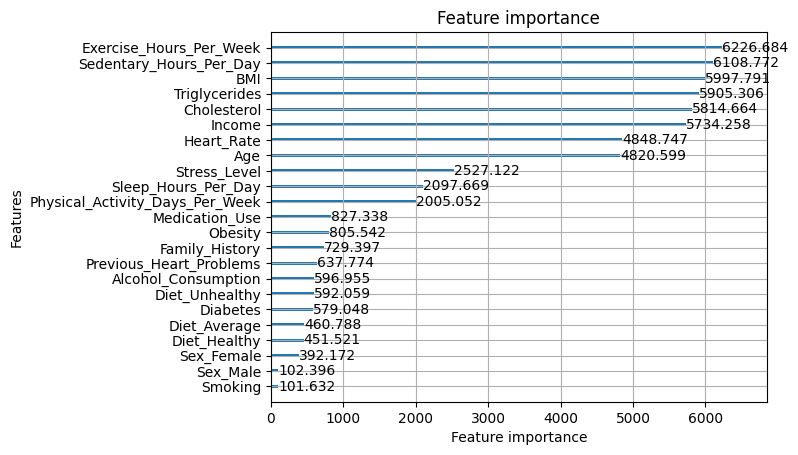

In [24]:
y_pred_prob = model.predict(test.drop(columns=target), num_iteration=model.best_iteration)
y_pred = (y_pred_prob > 0.5).astype(int) 

accuracy = accuracy_score(test[target], y_pred)
print(f'Accuracy на тесте: {accuracy:.4f}')
print(classification_report(test[target], y_pred))

lgb.plot_importance(model, max_num_features=50, importance_type='gain')


y_pred_prob = model.predict(test.drop(columns=target), num_iteration=model.best_iteration)

roc_auc = roc_auc_score(test[target], y_pred_prob)
print(f'ROC-AUC Score на тесте: {roc_auc:.4f}')

In [25]:
train = train.drop(columns=['Smoking', 'Sex_Male', 'Sex_Female'])
val = val.drop(columns=['Smoking', 'Sex_Male', 'Sex_Female'])
test = test.drop(columns=['Smoking', 'Sex_Male', 'Sex_Female'])

In [26]:
train_data = lgb.Dataset(train.drop(columns=target), label=train[target])
val_data = lgb.Dataset(val.drop(columns=target), label=val[target], reference=train_data)

params = {
    'objective': 'binary',        
    'metric': 'accuracy',   
    'boosting_type': 'gbdt',    
    'learning_rate': 0.05,        
    'num_leaves': 31,          
    'max_depth': -1,             
    'verbose': -1            
}

model = lgb.train(
    params,
    train_data,
    valid_sets=[val_data],
    num_boost_round=1000,
)

Accuracy на тесте: 0.5876
              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1125
           1       0.35      0.18      0.23       628

    accuracy                           0.59      1753
   macro avg       0.50      0.50      0.48      1753
weighted avg       0.54      0.59      0.54      1753

ROC-AUC Score на тесте: 0.5034


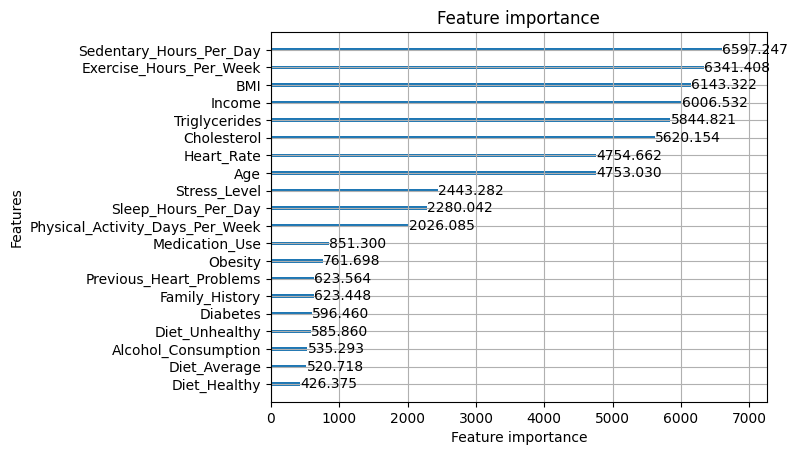

In [27]:
y_pred_prob = model.predict(test.drop(columns=target), num_iteration=model.best_iteration)
y_pred = (y_pred_prob > 0.5).astype(int)


accuracy = accuracy_score(test[target], y_pred)
print(f'Accuracy на тесте: {accuracy:.4f}')
print(classification_report(test[target], y_pred))

lgb.plot_importance(model, max_num_features=50, importance_type='gain')


y_pred_prob = model.predict(test.drop(columns=target), num_iteration=model.best_iteration)

roc_auc = roc_auc_score(test[target], y_pred_prob)
print(f'ROC-AUC Score на тесте: {roc_auc:.4f}')

In [29]:
train = train.drop(columns=['Diet_Healthy', 'Diet_Average', 'Diet_Unhealthy', 'Diabetes'])
val = val.drop(columns=['Diet_Healthy', 'Diet_Average', 'Diet_Unhealthy', 'Diabetes'])
test = test.drop(columns=['Diet_Healthy', 'Diet_Average', 'Diet_Unhealthy', 'Diabetes'])

In [30]:
train_data = lgb.Dataset(train.drop(columns=target), label=train[target])
val_data = lgb.Dataset(val.drop(columns=target), label=val[target], reference=train_data)

params = {
    'objective': 'binary',        
    'metric': 'accuracy',      
    'boosting_type': 'gbdt',      
    'learning_rate': 0.05,        
    'num_leaves': 31,          
    'max_depth': -1,         
    'verbose': -1              
}

model = lgb.train(
    params,
    train_data,
    valid_sets=[val_data],
    num_boost_round=1000,
)

Accuracy на тесте: 0.5801
              precision    recall  f1-score   support

           0       0.64      0.80      0.71      1125
           1       0.34      0.19      0.24       628

    accuracy                           0.58      1753
   macro avg       0.49      0.49      0.48      1753
weighted avg       0.53      0.58      0.54      1753

ROC-AUC Score на тесте: 0.5060


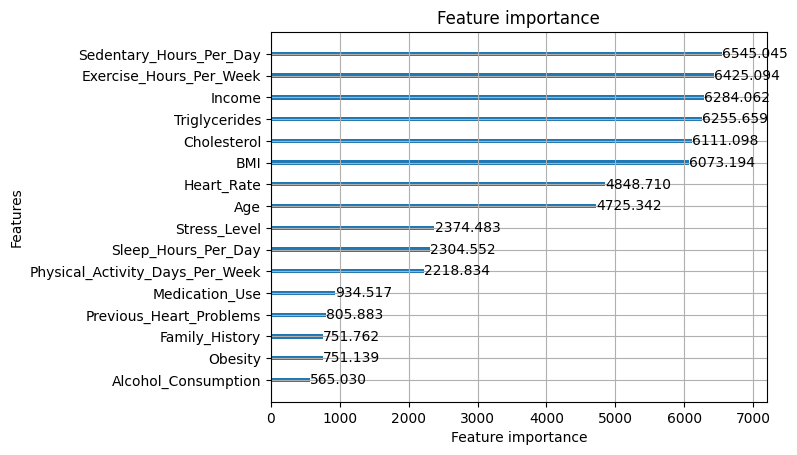

In [31]:
y_pred_prob = model.predict(test.drop(columns=target), num_iteration=model.best_iteration)
y_pred = (y_pred_prob > 0.5).astype(int) 

accuracy = accuracy_score(test[target], y_pred)
print(f'Accuracy на тесте: {accuracy:.4f}')
print(classification_report(test[target], y_pred))

lgb.plot_importance(model, max_num_features=50, importance_type='gain')


y_pred_prob = model.predict(test.drop(columns=target), num_iteration=model.best_iteration)

roc_auc = roc_auc_score(test[target], y_pred_prob)
print(f'ROC-AUC Score на тесте: {roc_auc:.4f}')

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5257 entries, 5959 to 2024
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              5257 non-null   int64  
 1   Cholesterol                      5257 non-null   int64  
 2   Heart Rate                       5257 non-null   int64  
 3   Family History                   5257 non-null   int64  
 4   Obesity                          5257 non-null   int64  
 5   Alcohol Consumption              5257 non-null   int64  
 6   Exercise Hours Per Week          5257 non-null   float64
 7   Previous Heart Problems          5257 non-null   int64  
 8   Medication Use                   5257 non-null   int64  
 9   Stress Level                     5257 non-null   int64  
 10  Sedentary Hours Per Day          5257 non-null   float64
 11  Income                           5257 non-null   int64  
 12  BMI                   

In [33]:
train = train.drop(columns=['Alcohol Consumption', 'Obesity', 'Family History', 'Previous Heart Problems', 'Medication Use'])
val = val.drop(columns=['Alcohol Consumption', 'Obesity', 'Family History', 'Previous Heart Problems', 'Medication Use'])
test = test.drop(columns=['Alcohol Consumption', 'Obesity', 'Family History', 'Previous Heart Problems', 'Medication Use'])

#### BEST

In [34]:
train_data = lgb.Dataset(train.drop(columns=target), label=train[target])
val_data = lgb.Dataset(val.drop(columns=target), label=val[target], reference=train_data)

params = {
    'objective': 'binary',      
    'metric': 'accuracy',       
    'boosting_type': 'gbdt',    
    'learning_rate': 0.05,       
    'num_leaves': 31,          
    'max_depth': -1,          
    'verbose': -1          
}


model = lgb.train(
    params,
    train_data,
    valid_sets=[val_data],
    num_boost_round=1000,
)

Accuracy на тесте: 0.6024
              precision    recall  f1-score   support

           0       0.65      0.82      0.73      1125
           1       0.40      0.21      0.28       628

    accuracy                           0.60      1753
   macro avg       0.52      0.52      0.50      1753
weighted avg       0.56      0.60      0.57      1753

ROC-AUC Score на тесте: 0.5256


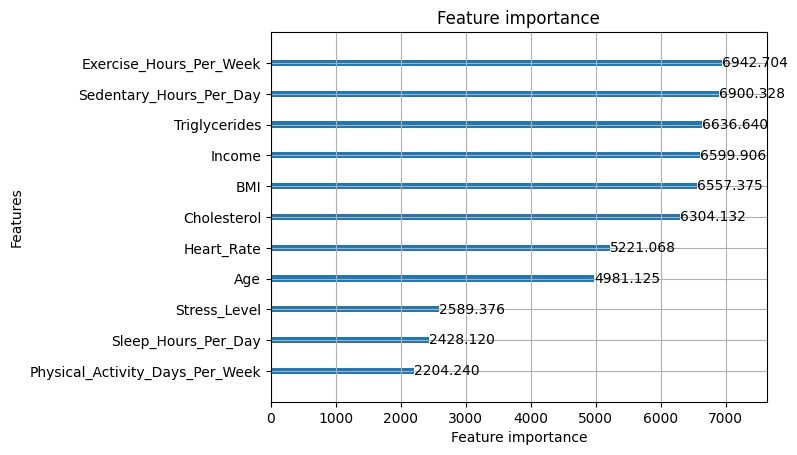

In [35]:
y_pred_prob = model.predict(test.drop(columns=target), num_iteration=model.best_iteration)
y_pred = (y_pred_prob > 0.5).astype(int) 

accuracy = accuracy_score(test[target], y_pred)
print(f'Accuracy на тесте: {accuracy:.4f}')
print(classification_report(test[target], y_pred))

lgb.plot_importance(model, max_num_features=50, importance_type='gain')


y_pred_prob = model.predict(test.drop(columns=target), num_iteration=model.best_iteration)

roc_auc = roc_auc_score(test[target], y_pred_prob)
print(f'ROC-AUC Score на тесте: {roc_auc:.4f}')

In [36]:
train = train.drop(columns=['Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Stress Level'])
val = val.drop(columns=['Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Stress Level'])
test = test.drop(columns=['Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Stress Level'])

In [37]:
train_data = lgb.Dataset(train.drop(columns=target), label=train[target])
val_data = lgb.Dataset(val.drop(columns=target), label=val[target], reference=train_data)

params = {
    'objective': 'binary',       
    'metric': 'accuracy',     
    'boosting_type': 'gbdt',     
    'learning_rate': 0.05,      
    'num_leaves': 31,           
    'max_depth': -1,            
    'verbose': -1                   
}


model = lgb.train(
    params,
    train_data,
    valid_sets=[val_data],
    num_boost_round=1000,
)

Accuracy на тесте: 0.5847
              precision    recall  f1-score   support

           0       0.64      0.80      0.71      1125
           1       0.35      0.19      0.25       628

    accuracy                           0.58      1753
   macro avg       0.50      0.50      0.48      1753
weighted avg       0.54      0.58      0.55      1753

ROC-AUC Score на тесте: 0.5074


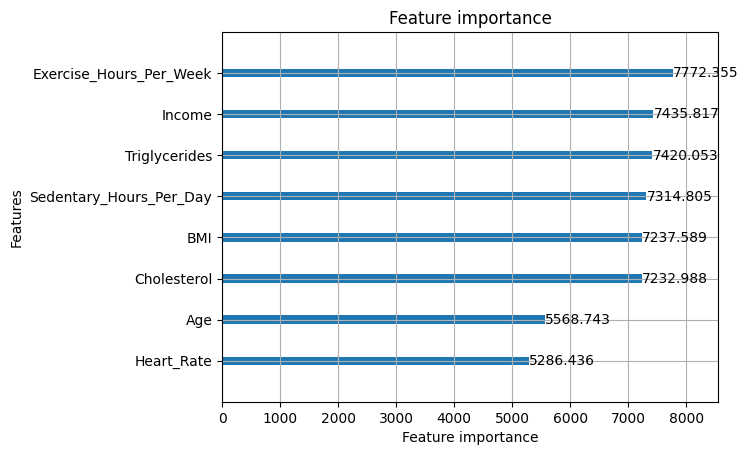

In [38]:
y_pred_prob = model.predict(test.drop(columns=target), num_iteration=model.best_iteration)
y_pred = (y_pred_prob > 0.5).astype(int) 

accuracy = accuracy_score(test[target], y_pred)
print(f'Accuracy на тесте: {accuracy:.4f}')
print(classification_report(test[target], y_pred))

lgb.plot_importance(model, max_num_features=50, importance_type='gain')


y_pred_prob = model.predict(test.drop(columns=target), num_iteration=model.best_iteration)

roc_auc = roc_auc_score(test[target], y_pred_prob)
print(f'ROC-AUC Score на тесте: {roc_auc:.4f}')

In [39]:
train = train.drop(columns=['Heart Rate', 'Age'])
val = val.drop(columns=['Heart Rate', 'Age'])
test = test.drop(columns=['Heart Rate', 'Age'])

In [40]:
train_data = lgb.Dataset(train.drop(columns=target), label=train[target])
val_data = lgb.Dataset(val.drop(columns=target), label=val[target], reference=train_data)

params = {
    'objective': 'binary',         
    'metric': 'accuracy',       
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,          
    'num_leaves': 31,              
    'max_depth': -1,              
    'verbose': -1              
}

model = lgb.train(
    params,
    train_data,
    valid_sets=[val_data],
    num_boost_round=1000,
)

Accuracy на тесте: 0.5859
              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1125
           1       0.37      0.23      0.29       628

    accuracy                           0.59      1753
   macro avg       0.51      0.51      0.50      1753
weighted avg       0.55      0.59      0.56      1753

ROC-AUC Score на тесте: 0.5051


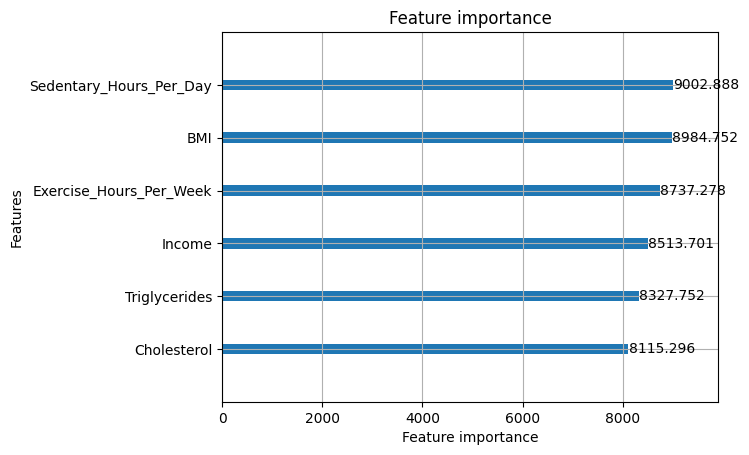

In [41]:
y_pred_prob = model.predict(test.drop(columns=target), num_iteration=model.best_iteration)
y_pred = (y_pred_prob > 0.5).astype(int)  

accuracy = accuracy_score(test[target], y_pred)
print(f'Accuracy на тесте: {accuracy:.4f}')
print(classification_report(test[target], y_pred))

lgb.plot_importance(model, max_num_features=50, importance_type='gain')


y_pred_prob = model.predict(test.drop(columns=target), num_iteration=model.best_iteration)

roc_auc = roc_auc_score(test[target], y_pred_prob)
print(f'ROC-AUC Score на тесте: {roc_auc:.4f}')